In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data=pd.read_csv(r"/content/weather.csv")

In [4]:

# Convert 'Date.Full' to datetime format
data['Date.Full'] = pd.to_datetime(data['Date.Full'])

# Set 'Date.Full' as the index
data.set_index('Date.Full', inplace=True)


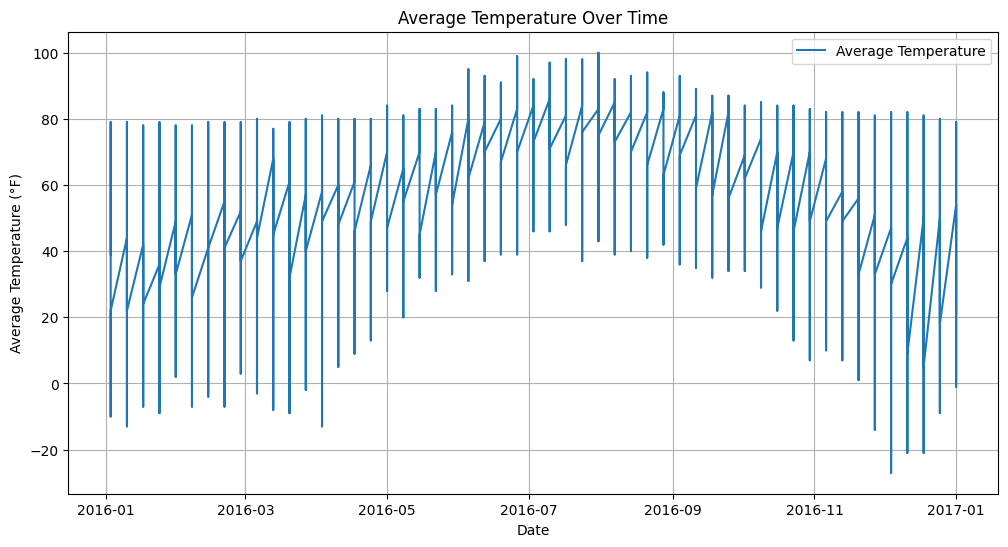

In [5]:
#  1. Line Plot for Average Temperature over Time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Data.Temperature.Avg Temp'], label='Average Temperature')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


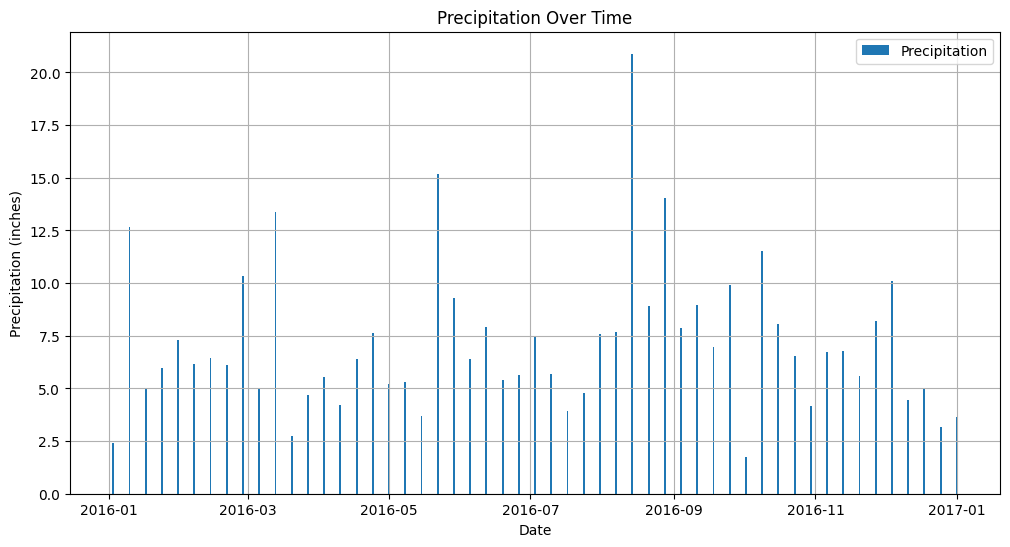

In [6]:
# 2. Bar Plot for Precipitation over Time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Data.Precipitation'], label='Precipitation')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.grid(True)
plt.show()

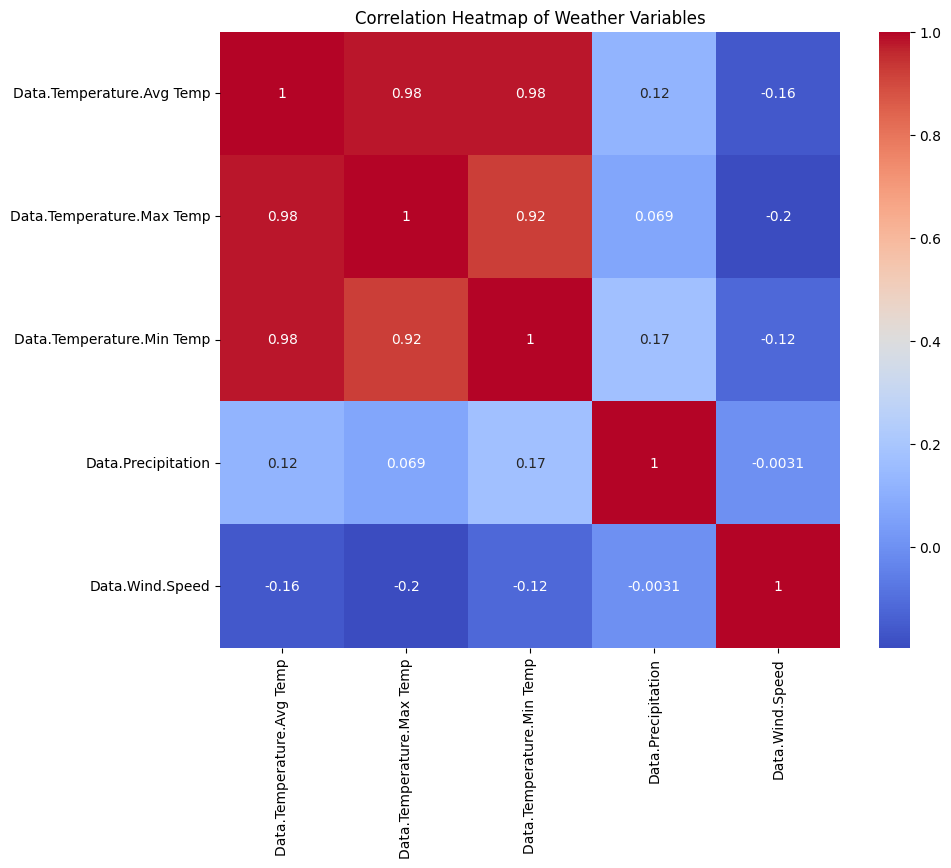

In [7]:
# 3. Heatmap for Correlation between Weather Variables
plt.figure(figsize=(10, 8))
corr = data[['Data.Temperature.Avg Temp', 'Data.Temperature.Max Temp', 'Data.Temperature.Min Temp', 'Data.Precipitation', 'Data.Wind.Speed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

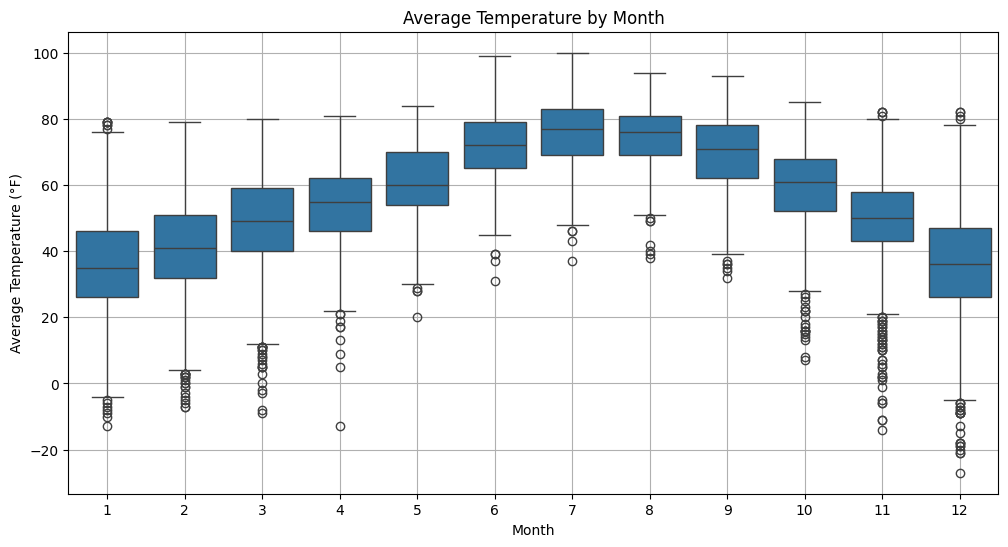

In [8]:
# 4. Box Plot for Average Temperature by Month
data['Month'] = data.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Data.Temperature.Avg Temp', data=data)
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.grid(True)
plt.show()

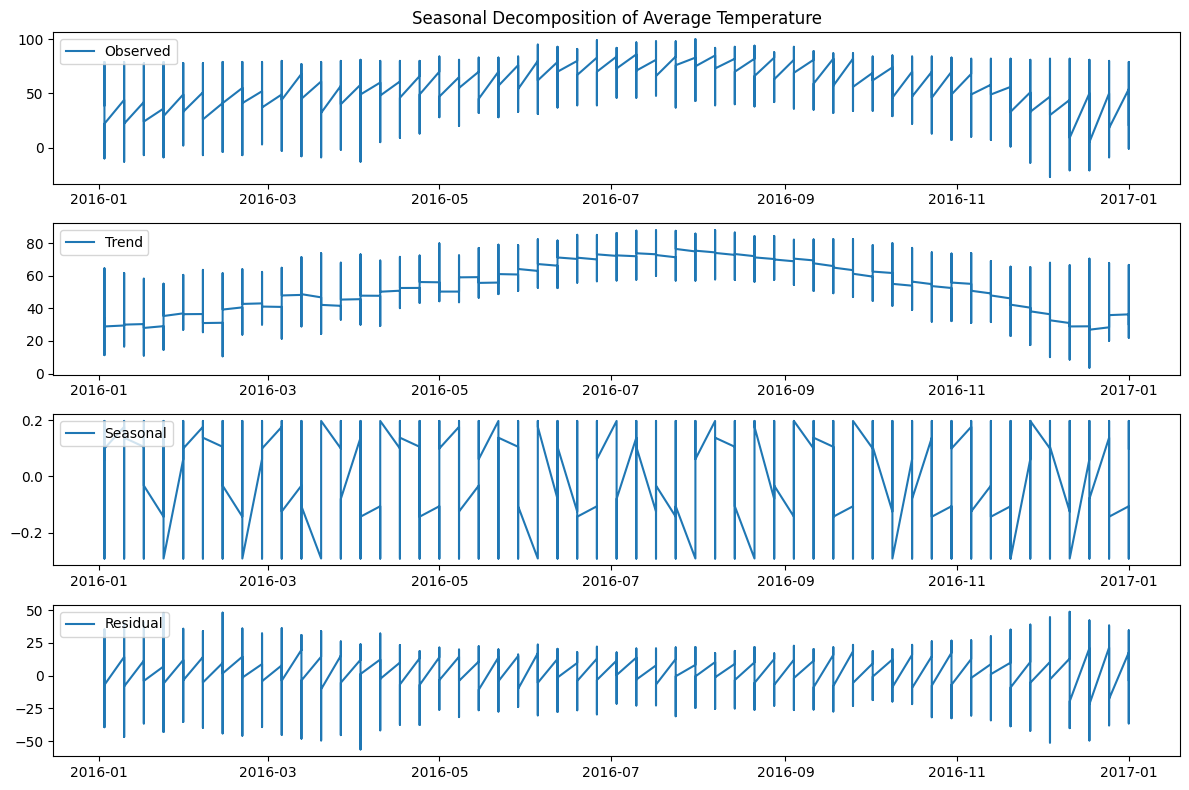

In [9]:
# 5. Seasonal Decomposition of Average Temperature
decomposition = seasonal_decompose(data['Data.Temperature.Avg Temp'], model='additive', period=12)
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition of Average Temperature')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()